In [ ]:
%load_ext autoreload
%autoreload 2

In [114]:
import os
import re
from glob import glob
from pathlib import Path

import matplotlib.pyplot as plt
import numpy as np
from scipy.io import wavfile
from tqdm import tqdm

from enfify.config import EXTERNAL_DATA_DIR

In [115]:
def info(files):
    rates = []
    lens = []
    bit_depths = []
    for file in files:
        rate, data = wavfile.read(file)
        rates.append(rate)
        lens.append(len(data) / rate)
        bit_depths.append(data.dtype.itemsize * 8)
        assert data.ndim == 1

    print(f"rate: {np.median(rates)} Hz")
    print(f"all rates equal: {all(rate == rates[0] for rate in rates)}")
    print(f"bit depth: {np.median(bit_depths)} bits")

    plt.hist(lens, bins=100)
    plt.xlabel("Length of .wav file (s)")
    plt.show()

    # filenames of unique rates
    unique_rates = np.unique(rates)
    print(f"unique_rates: {unique_rates}")
    # get one filename of each rate
    for rate in unique_rates:
        print(rate, os.path.basename(files[np.where(rates == rate)[0][0]]), len(np.where(rates == rate)[0]))

400


/tmp/ipykernel_208172/390151638.py:6: WavFileWarning: Chunk (non-data) not understood, skipping it.
  rate, data = wavfile.read(file)


rate: 44100.0 Hz
all rates equal: True
bit depth: 16.0 bits


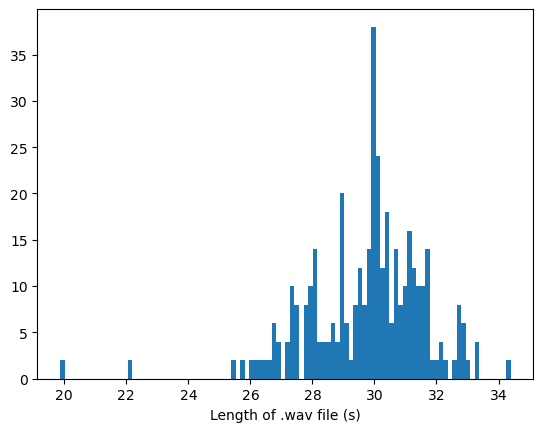

unique_rates: [44100]
44100 HI22.wav 400


In [116]:
# Carioca 1
carioca_1_dir = EXTERNAL_DATA_DIR / "Carioca" / "BASE CARIOCA 1"

files = glob(str(carioca_1_dir / "**" / "*.wav"), recursive=True)
print(len(files))

info(files)

200


/tmp/ipykernel_208172/390151638.py:6: WavFileWarning: Chunk (non-data) not understood, skipping it.
  rate, data = wavfile.read(file)


rate: 11025.0 Hz
all rates equal: False
bit depth: 16.0 bits


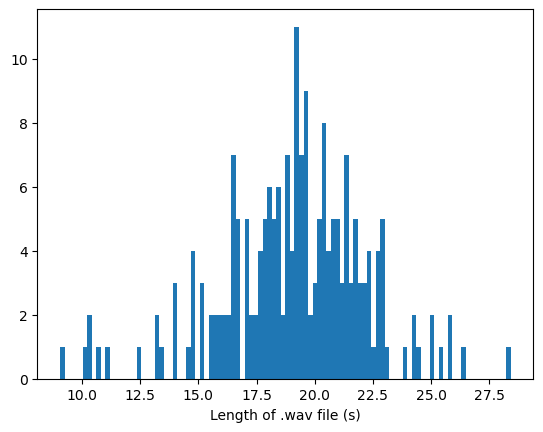

unique_rates: [11025 44100]
11025 HC24.wav 196
44100 HF18e.wav 4


In [117]:
# Carioca 2
carioca_2_dir = EXTERNAL_DATA_DIR / "Carioca" / "BASE CARIOCA 2"

files = glob(str(carioca_2_dir / "**"/ "*.wav"), recursive=True)
print(len(files))

info(files)